07.1

In [28]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from scipy import stats
import matplotlib.pyplot as plt

In [29]:
N =1000

x1 = np.random.normal(0,1,N)
x2 = x1 + np.random.normal(0,3,N)
x3 = 2*x1 + x2
data = np.array([x1,x2,x3])
print('data','\n',data )
a=np.shape(data)
print(a)

data 
 [[ 1.09727829 -0.30954563 -0.71400123 ... -0.04347316  1.04567146
   0.77229859]
 [ 5.64340863 -0.58989431  1.46786472 ... -0.64614208 -0.21169139
  -0.61745061]
 [ 7.8379652  -1.20898556  0.03986225 ... -0.7330884   1.87965152
   0.92714657]]
(3, 1000)


In [30]:
cov_mtrx = np.cov(data)
print('covariance matrix',cov_mtrx,'\n' )

l, v = la.eig(cov_mtrx)
print('eigenvectors' , v ,'\n')
print('eigenvalues ' , l ,'\n')

# sorted_index = np.argsort(l)[::-1]
# sorted_eigenvalue = l[sorted_index]
# sorted_eigenvectors =v[:,sorted_index]
# print(sorted_index)
# print(sorted_eigenvectors)

covariance matrix [[ 0.97974669  0.96408397  2.92357735]
 [ 0.96408397 10.10624066 12.03440861]
 [ 2.92357735 12.03440861 17.8815633 ]] 

eigenvectors [[-0.11220581 -0.81649658  0.56634194]
 [-0.58141857 -0.40824829 -0.70376543]
 [-0.80583019  0.40824829  0.42891845]] 

eigenvalues  [2.69716559e+01+0.j 7.69563050e-16+0.j 1.99589479e+00+0.j] 



In [31]:
U, spectrum, Vt = np.linalg.svd(cov_mtrx)
u_shape=np.shape(U)
print(u_shape)
print(U,'\n')
print(spectrum,'\n')
print(Vt,'\n')
print(spectrum[0],U[0])
print(spectrum[1],U[1])
print(spectrum[2],U[2])

(3, 3)
[[-0.11220581  0.56634194 -0.81649658]
 [-0.58141857 -0.70376543 -0.40824829]
 [-0.80583019  0.42891845  0.40824829]] 

[2.69716559e+01 1.99589479e+00 1.83643846e-15] 

[[-0.11220581 -0.58141857 -0.80583019]
 [ 0.56634194 -0.70376543  0.42891845]
 [-0.81649658 -0.40824829  0.40824829]] 

26.971655859405768 [-0.11220581  0.56634194 -0.81649658]
1.9958947865167287 [-0.58141857 -0.70376543 -0.40824829]
1.836438458794172e-15 [-0.80583019  0.42891845  0.40824829]


In [32]:
def variablities(N) :
    for k in range(1,N+1):
        total_var=np.sum(spectrum[:k])/np.sum(spectrum)
        if total_var>= 0.99 :
            print(k)
            break
variablities(N)

2


In [33]:
#since the k equales to '1' ,the first eigenvalues account for the full variability of the dataset

Lambda = np.diag(l)
Lambda[2,2] = 0
RedLamb = np.delete(Lambda, 2,0)
RedLamb = np.delete(RedLamb, 2,1)
print("Reduced matrix of eigenvectors: \n", RedLamb)

Reduced matrix of eigenvectors: 
 [[2.69716559e+01+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 7.69563050e-16+0.j]]


Text(0, 0.5, 'x2')

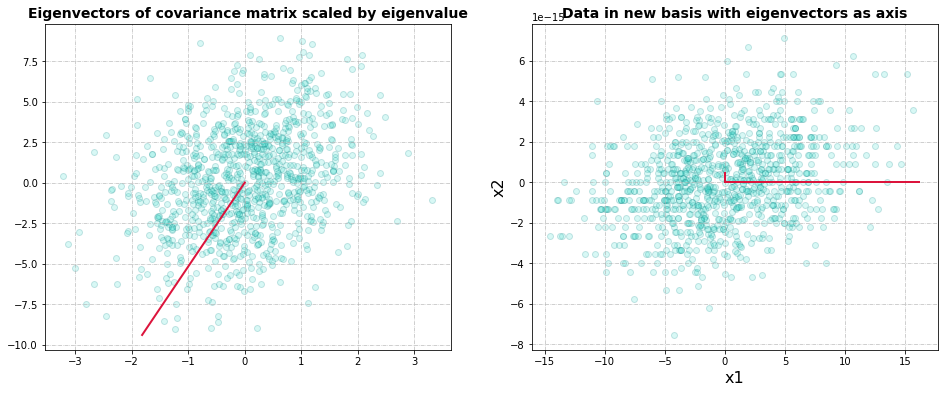

In [38]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
ax1.scatter(data[0,:], data[1,:], c = "turquoise", ec = "teal", alpha=0.2)


scale_factor=0.6

for li, vi in zip(l, v.T): 
    ax1.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], color = "crimson", lw=2)

ax1.grid(linestyle="-.", linewidth=0.6)
ax1.set_title("Eigenvectors of covariance matrix scaled by eigenvalue",fontsize=14,fontweight='bold')

# Rotate all the data points accordingly to the new base (given by the eigenvectors we kept)
datarot = np.dot(v.T, data)
ax2.scatter(datarot[0,:], datarot[1,:], c = "turquoise", ec = "teal", alpha=0.2)

for li, vi in zip(l, np.diag([1]*2)):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], color = "crimson", lw=2)

ax2.grid(linestyle="-.", linewidth=0.6)
ax2.set_title("Data in new basis with eigenvectors as axis",fontsize=14,fontweight='bold')
ax2.set_xlabel("x1",fontsize=16)
ax2.set_ylabel("x2",fontsize=16)

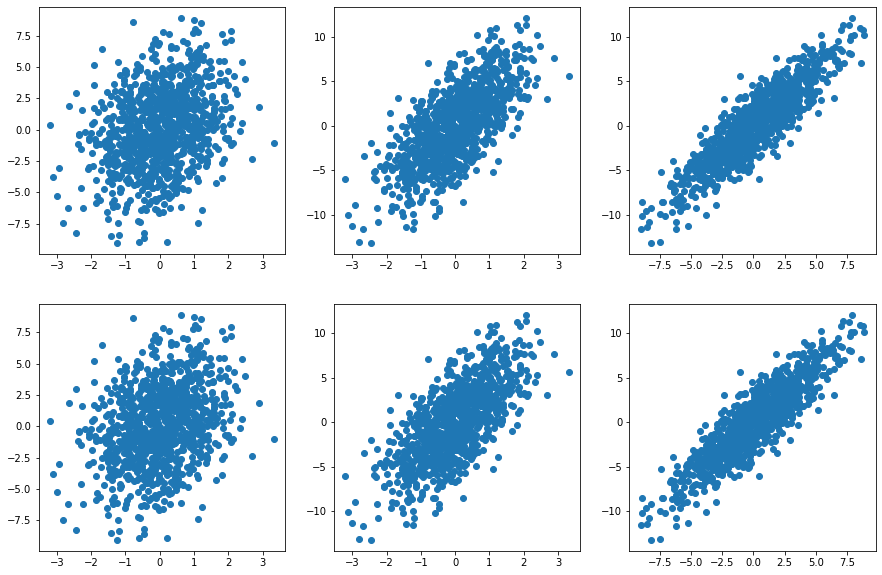

In [39]:
import matplotlib.pyplot as plt 
v = v[:,:2]
x_pca = np.dot(v.T,data)
x_pca = np.vstack([data, np.zeros((1,N))]) #padding matrix

fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,10)

ax[0,0].scatter(data[0,:],data[1,:])

ax[0,1].scatter(data[0,:],data[2,:])

ax[0,2].scatter(data[1,:],data[2,:])

ax[1,0].scatter(x_pca[0,:],x_pca[1,:])

ax[1,1].scatter(x_pca[0,:],x_pca[2,:])

ax[1,2].scatter(x_pca[1,:],x_pca[2,:])

07.2

In [40]:
for i in range(10):
    xn = np.random.normal(0, 1/50, N)
    datanoise = np.vstack((data,xn))
    data = datanoise

cov_mtrx_n = np.cov(datanoise)
ln, Vn = la.eig(cov_mtrx_n) 

#sorting them in non-increasing order as in la.svd() output
print("\n Eigenvalues and corresponding eigenvectors of the covariance matrix:")
for i in range(len(ln)):
    print("Eigenvalue: ", ln[i], "\n with eigenvector: ", Vn[:,i], '\n')

Un, spectrum_n, Vt_n = la.svd(cov_mtrx_n)

print("Using SVD we have: \n")
for i in range(len(ln)):
    print("Eigenvalue: ", spectrum_n[i], "\n with eigenvector: ", Un[:,i], '\n')


 Eigenvalues and corresponding eigenvectors of the covariance matrix:
Eigenvalue:  (26.9716581202393+0j) 
 with eigenvector:  [ 1.12205810e-01  5.81418542e-01  8.05830163e-01  1.89766722e-05
 -9.10677857e-05  6.91719912e-05 -2.49726711e-05  1.35181418e-04
 -7.36185611e-06  1.02383634e-04 -1.55129801e-04 -7.63291712e-05
  1.05166239e-04] 

Eigenvalue:  (1.9958968777279373+0j) 
 with eigenvector:  [-5.66341627e-01  7.03765127e-01 -4.28918127e-01  2.57266678e-04
  2.47867578e-04 -2.12212376e-04 -3.24389151e-04 -5.99825552e-05
  5.59534962e-04 -3.79695121e-04 -2.08236571e-04  3.59767729e-04
 -3.69368749e-04] 

Eigenvalue:  (2.4090399511121686e-16+0j) 
 with eigenvector:  [-8.16496581e-01 -4.08248290e-01  4.08248290e-01  3.85690322e-16
 -1.26180448e-15 -4.46636288e-15  6.93804134e-16 -3.71613352e-16
  4.76612938e-15 -1.37741421e-15  1.93260940e-15  2.70882338e-15
  1.09347923e-15] 

Eigenvalue:  (0.00046406660226145963+0j) 
 with eigenvector:  [ 1.99191065e-04 -2.86834044e-04  1.11548085e-

In [41]:
# Using SVD:
Un, spectrum_n, Vt_n = la.svd(cov_mtrx_n)

print("Using SVD we have: \n")
for i in range(len(ln)):
    print("Eigenvalue: ", spectrum_n[i], "\n with eigenvector: ", Un[:,i], '\n')

Using SVD we have: 

Eigenvalue:  26.971658120239304 
 with eigenvector:  [-1.12205810e-01 -5.81418542e-01 -8.05830163e-01 -1.89766722e-05
  9.10677857e-05 -6.91719912e-05  2.49726711e-05 -1.35181418e-04
  7.36185611e-06 -1.02383634e-04  1.55129801e-04  7.63291712e-05
 -1.05166239e-04] 

Eigenvalue:  1.9958968777279344 
 with eigenvector:  [ 5.66341627e-01 -7.03765127e-01  4.28918127e-01 -2.57266678e-04
 -2.47867578e-04  2.12212376e-04  3.24389151e-04  5.99825552e-05
 -5.59534962e-04  3.79695121e-04  2.08236571e-04 -3.59767729e-04
  3.69368749e-04] 

Eigenvalue:  0.00046406660226145947 
 with eigenvector:  [-1.99191065e-04  2.86834044e-04 -1.11548085e-04 -4.28356589e-01
 -3.02503146e-01  3.35285329e-01  1.41119638e-01 -3.11631790e-01
 -2.92467057e-01 -2.63198800e-01  1.96896023e-01  4.26701833e-01
  3.46271402e-01] 

Eigenvalue:  0.0004333238145398637 
 with eigenvector:  [ 9.29238018e-05 -9.72024545e-05  8.86451490e-05 -3.01146272e-01
  5.99440269e-01 -3.36689496e-01  2.10752660e-01  

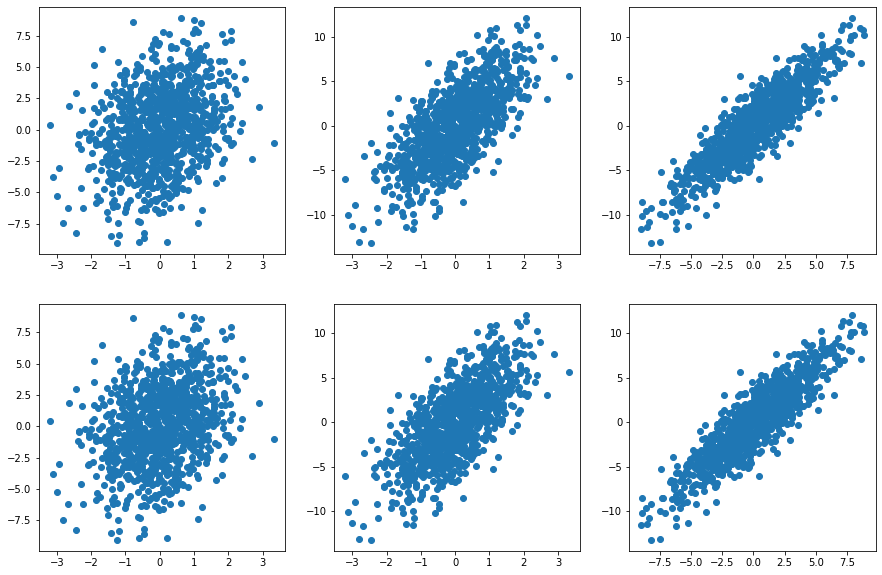

In [42]:
import matplotlib.pyplot as plt 
Vn=Vn[:,:2]
x_pca_n = np.dot(Vn.T,datanoise)
x_pca_n = np.vstack([data, np.zeros((1,N))]) #padding matrix

fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,10)

ax[0,0].scatter(datanoise[0,:],datanoise[1,:])

ax[0,1].scatter(datanoise[0,:],datanoise[2,:])

ax[0,2].scatter(datanoise[1,:],datanoise[2,:])

ax[1,0].scatter(x_pca_n[0,:],x_pca_n[1,:])

ax[1,1].scatter(x_pca_n[0,:],x_pca_n[2,:])

ax[1,2].scatter(x_pca_n[1,:],x_pca_n[2,:])